In [ ]:
import os
from pathlib import Path
from collections import deque
from datetime import datetime
import pandas as pd
from matplotlib import pyplot as plt

FILE_PATH = Path(os.path.realpath(__file__)).parent
timestamp_fmt = "%Y-%m-%d_%H:%M:%S.%f"

rapl_datafile = FILE_PATH / "rapl_wattameter.log"
print("RAPL file: ", rapl_datafile)

RAPL file:  /home/wdasilv/storage/WattAMeter/examples/post-process/rapl_wattameter.log


In [ ]:
_header = []
_data = deque([])

with open(rapl_datafile, "r") as f:
    # Skip 2 first lines
    print(f.readline(), end="")
    print(f.readline(), end="")

    # Read header
    _header = f.readline().split()[1:]
    _n_fields = len(_header)

    # Read data
    for _line in f:
        _fields = _line.split()
        _numeric_fields = [float("NAN")] * _n_fields
        _numeric_fields[0] = datetime.strptime(_fields[0], timestamp_fmt)
        _numeric_fields[1 : len(_fields)] = [float(val) for val in _fields[1:]]
        _data.append(_numeric_fields)

    # Compute elapsed time
    _t0 = _data[0][0].timestamp()
    elapsed_time = [0.0] * len(_data)
    for _i, _fields in enumerate(_data):
        elapsed_time[_i] = _fields[0].timestamp() - _t0  # in seconds

df = pd.DataFrame(_data, columns=_header)
df.set_index(_header[0], inplace=True)

# Display the first few rows to verify
print("First few rows of the data:")
print(df.head())
print(f"\nDataset shape: {df.shape}")
print(f"Column names: {df.columns}")

# 2025-10-07_09:38:40.617145 - Power data for run 10989526
# 2025-10-07_09:38:40.617145 - Tracking started
First few rows of the data:
                            reading-time[ns]     cpu-0[uJ]  cpu-0-core[uJ]  \
timestamp                                                                    
2025-10-07 09:38:40.623688           65530.0  2.380356e+10     268204101.0   
2025-10-07 09:38:40.723992           81655.0  2.381188e+10     268206069.0   
2025-10-07 09:38:40.824239           61083.0  2.381763e+10     268207687.0   
2025-10-07 09:38:40.924553           80523.0  2.382626e+10     268216796.0   
2025-10-07 09:38:41.024590           59771.0  2.383205e+10     268218444.0   

                               cpu-1[uJ]  cpu-1-core[uJ]   cpu-0[W]  \
timestamp                                                             
2025-10-07 09:38:40.623688  1.814681e+10     202901906.0  82.897152   
2025-10-07 09:38:40.723992  1.815515e+10     202924030.0  57.393532   
2025-10-07 09:38:40.824239  1.8160

130.50313051527007


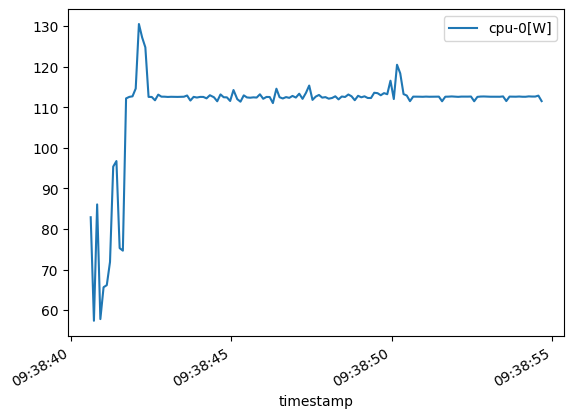

In [ ]:
print(df["cpu-0[W]"].max())
df.plot(y="cpu-0[W]")
plt.show()

142.08590712604868


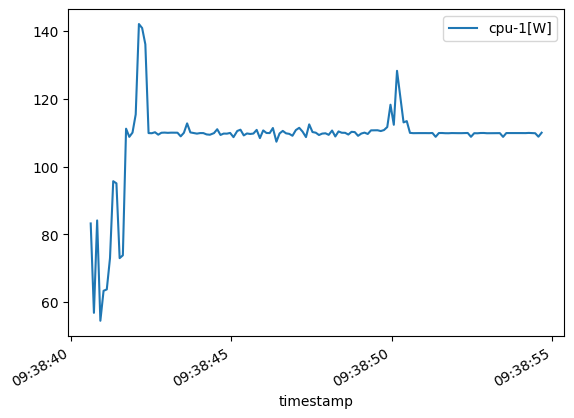

In [ ]:
print(df["cpu-1[W]"].max())
df.plot(y="cpu-1[W]")
plt.show()

0.5429910956415844


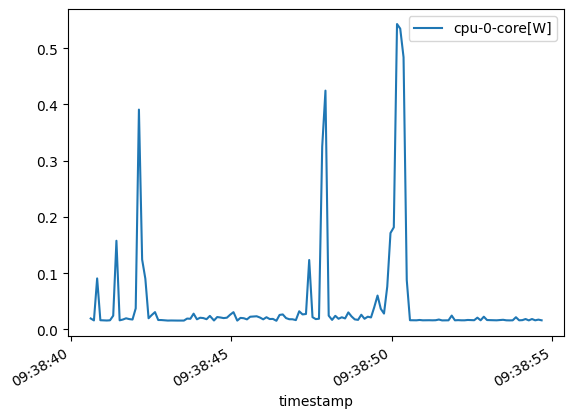

In [ ]:
print(df["cpu-0-core[W]"].max())
df.plot(y="cpu-0-core[W]")
plt.show()

4.859457506984312


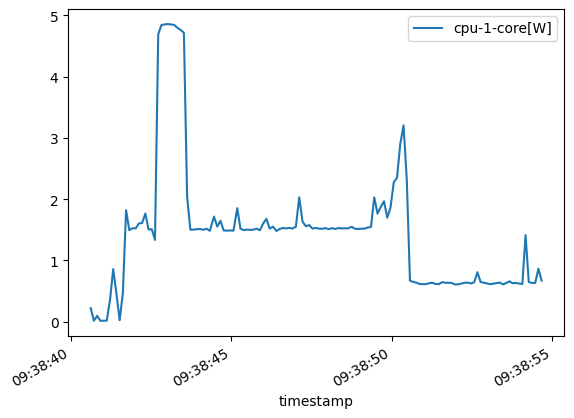

In [ ]:
print(df["cpu-1-core[W]"].max())
df.plot(y="cpu-1-core[W]")
plt.show()

In [ ]:
# Compute sum of power columns and sum of temperature columns
_power_columns = [col for col in df.columns if "W]" in col]
df["total_power"] = df[_power_columns].sum(axis=1)

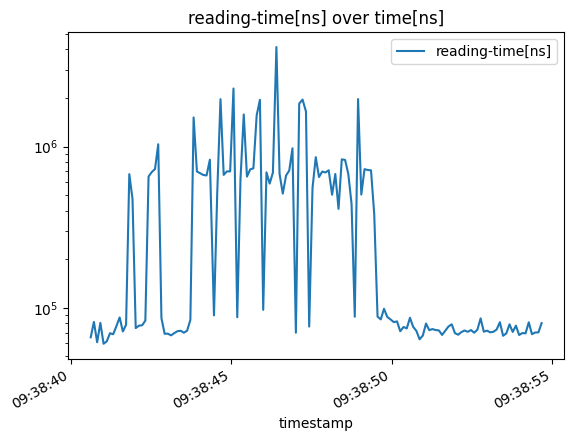

In [ ]:
# Plot
df.plot(
    y="reading-time[ns]",
    title="reading-time[ns] over time[ns]",
)
plt.yscale("log")
plt.show()

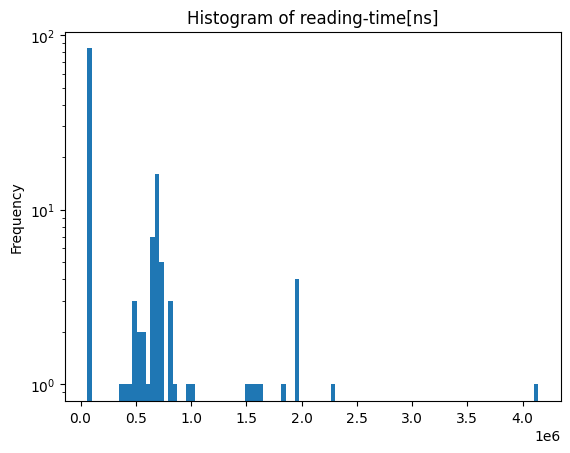

In [ ]:
# Plot an histogram of reading-time[ns] in log-log scale
df["reading-time[ns]"].plot(
    kind="hist", logy=True, bins=100, title="Histogram of reading-time[ns]"
)
plt.show()

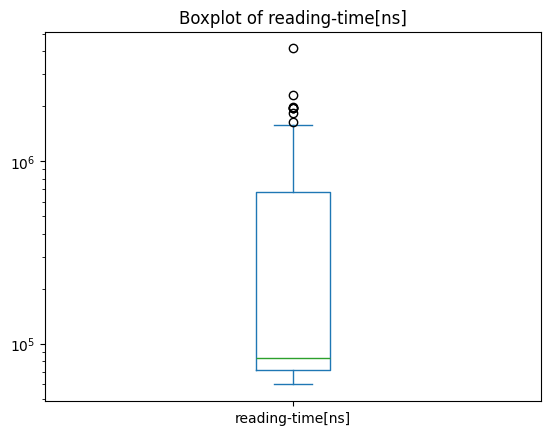

In [ ]:
# Plot an histogram of reading-time[ns] using boxplot
df["reading-time[ns]"].plot(
    kind="box", title="Boxplot of reading-time[ns]", logy=True
)
plt.show()

In [ ]:
# Compute correlation between columns
correlation_matrix = df.corr()
print("\nCorrelation matrix:")
print(correlation_matrix)


Correlation matrix:
                  reading-time[ns]  cpu-0[uJ]  cpu-0-core[uJ]  cpu-1[uJ]  \
reading-time[ns]          1.000000  -0.217986       -0.312934  -0.217411   
cpu-0[uJ]                -0.217986   1.000000        0.971744   0.999996   
cpu-0-core[uJ]           -0.312934   0.971744        1.000000   0.971934   
cpu-1[uJ]                -0.217411   0.999996        0.971934   1.000000   
cpu-1-core[uJ]           -0.152989   0.984617        0.944355   0.984807   
cpu-0[W]                  0.148478   0.382801        0.341820   0.384172   
cpu-0-core[W]            -0.088512   0.007224       -0.015295   0.006877   
cpu-1[W]                  0.073667   0.315452        0.283825   0.316627   
cpu-1-core[W]             0.092377  -0.346778       -0.357302  -0.345529   
total_power               0.112709   0.328340        0.291999   0.329652   

                  cpu-1-core[uJ]  cpu-0[W]  cpu-0-core[W]  cpu-1[W]  \
reading-time[ns]       -0.152989  0.148478      -0.088512  0.073667   
